In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('dark_background')
%matplotlib inline
import gensim.downloader
from nltk.tokenize import word_tokenize
import sys
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    DIR = '/content/drive/MyDrive/Colab Notebooks/OddSemester2024/AML/Codes'
    DATA_DIR = DIR+'/Data/'
else:
    DATA_DIR = 'Data/'

Mounted at /content/drive


In [3]:
FILE = DATA_DIR + 'Social_Network_Ads.csv'
data = pd.read_csv(FILE)
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
X = data.iloc[:, [2,3]].values

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_Scaled = sc.fit_transform(X)

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++')
y_kmeans = kmeans.fit_predict(X_Scaled)

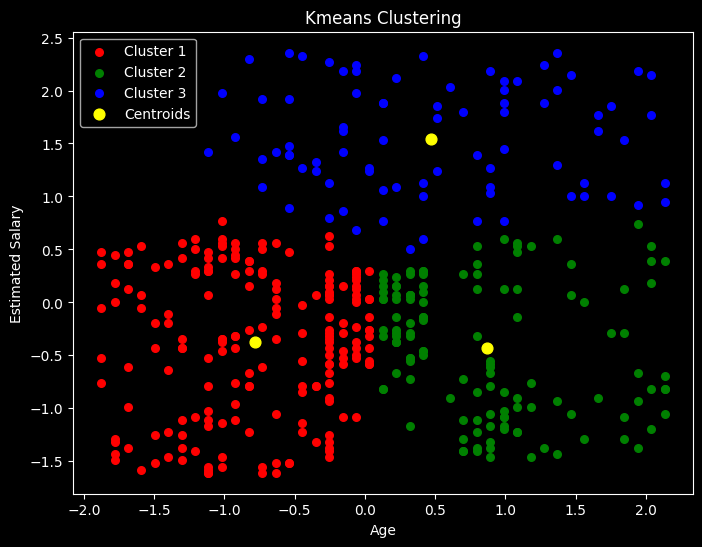

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(X_Scaled[y_kmeans == 0, 0], X_Scaled[y_kmeans == 0, 1], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(X_Scaled[y_kmeans == 1, 0], X_Scaled[y_kmeans == 1, 1], s = 30, c = 'green', label = 'Cluster 2')
plt.scatter(X_Scaled[y_kmeans == 2, 0], X_Scaled[y_kmeans == 2, 1], s = 30, c = 'blue', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 60, c = 'yellow', label = 'Centroids')
plt.title('Kmeans Clustering')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()